In [1]:
# Data manipulation libraries

import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
# Data visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

# Set a white background for all the plots

sns.set_style('whitegrid')

In [3]:
# See all plots in the notebook itself

%matplotlib inline

In [4]:
# Load the Boston dataset provided with scikit-learn 

from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
# Call the DESCR method (describe) on this dataset

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

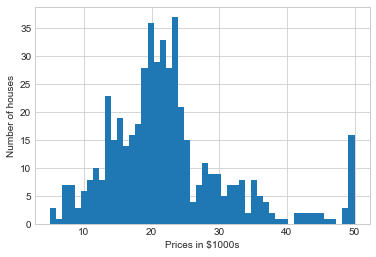

In [6]:
# Plot a histogram of the target values, which are the median values of homes

plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

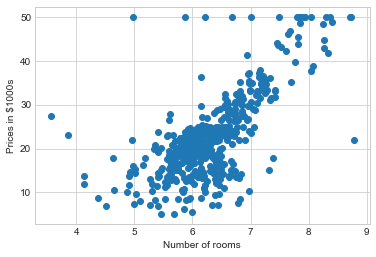

In [7]:
# Make a scatter plot of the average number of rooms per dwelling against the target

plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('Prices in $1000s')

In [8]:
# From the plot, we can see the trend that the price of house increases as the number of rooms increase, which is intuitive

In [9]:
# Convert the dataset into a pandas dataframe to use it with seaborn for visualisations

boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Add the target column to the dataframe to complete it

boston_df['PRICE'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


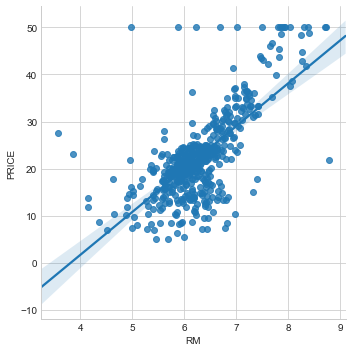

In [11]:
# Since dataset is complete now, make a scatter plot with a simple linear regression fit using seaborn

sns.lmplot('RM','PRICE',data=boston_df)

In [12]:
# Use numpy to perform simple univariate linear regression with feature as number of rooms and target as price

X = boston_df.RM

X.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

In [13]:
# Numpy needs a 2x1 array for the features, so use vstack method to achieve that

X = np.vstack(X)

In [14]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [15]:
# Equation of a line is Y = mX + b which can be rewritten as Y = [X, 1][m, b]^T

In [16]:
# Now that it is a 506x1 matrix, we will make it a 506x2 matrix with all 2nd column values as 1

X = np.array([[value, 1] for value in X])

In [17]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [18]:
# Set Y as the target and use least squares method from the numpy library to calculate the slope and constant of best fit line

Y = boston_df['PRICE']

m, b = np.linalg.lstsq(X,Y)[0]

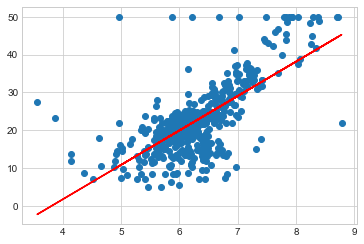

In [19]:
plt.plot(boston_df.RM,boston_df.PRICE,'o')

x = boston_df.RM

plt.plot(x,m*x+b,'r',label='Best Fit Line')

In [20]:
# The above method was the least squares method. We can also use the root mean square error method to calculate the error 
# between the actual target and the regression line. It is similar to standard deviation. We take the square root of the total
# sum of squared errors divided by the number of values we have

result = np.linalg.lstsq(X,Y)

# From the documentation, we know that sum of errors is stored at '1' index location in the lstsq object
total_error = result[1]

rmse = np.sqrt(total_error/len(X))

print('The root mean squared error is %.2f' %rmse)

The root mean squared error is 6.60


In [21]:
# Twice the above value in thousands of dollars is $13,200. This means that the actual value of the target for any observation 
# will be within +/- $13,200 from the regression fit line value for that observation 95% of the times

In [22]:
# Now we can carry out multivariate linear regression using sklearn

import sklearn
from sklearn.linear_model import LinearRegression

In [23]:
# Create a linear regression object

linreg = LinearRegression()

In [24]:
# Use all features and set the features and target 

features = boston_df.drop('PRICE',axis=1)

target = boston_df.PRICE

In [25]:
# Perform the multivariate linear regression

linreg.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Print out the intercept value and the number of coefficients in the regression line

print('The intercept value of the regression line is %.2f' %linreg.intercept_)
print('The number of coefficients in the regression line is %d' %len(linreg.coef_))

The intercept value of the regression line is 36.49
The number of coefficients in the regression line is 13


In [27]:
# To visually see each coefficient value, we can make a dataframe 

reg_df = DataFrame(boston_df.columns)
reg_df.columns = ['Features']
reg_df['Coefficient'] = Series(linreg.coef_)
reg_df

,Features,Coefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [28]:
# Since Price is the target, there is no coefficient value for it

In [29]:
# Use cross validation from sklearn to split the data into training and testing sets. We will just use number of rooms as feature

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y)

In [30]:
# See how sklearn split the data into training and test sets

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [31]:
# Create a linear regression object and perform it with training set

linreg = LinearRegression()

linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Predict targets for the training set and test set from the trained model

pred_train = linreg.predict(X_train)

pred_test = linreg.predict(X_test)

In [33]:
# Calculate mean squared error of the predictions from the actual targets and print them out

print('After training set, the MSE of training set is %.2f' %np.mean((Y_train-pred_train)**2))

print('After training set, the MSE of testing set is %.2f' %np.mean((Y_test-pred_test)**2))

After training set, the MSE of training set is 43.25
After training set, the MSE of testing set is 44.68


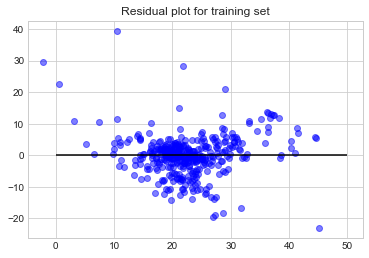

In [34]:
# Make residual plots to see if regression is the right choice of machine learning algorithm

plt.scatter(pred_train,(Y_train-pred_train),alpha=0.5,color='b')
plt.hlines(y=0,color='black',xmin=0,xmax=50)

plt.title('Residual plot for training set')

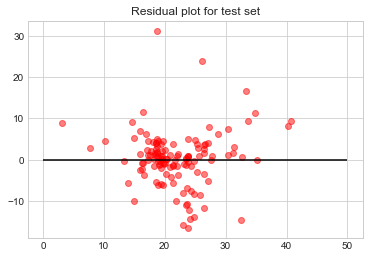

In [35]:
plt.scatter(pred_test,(Y_test-pred_test),alpha=0.5,color='r')
plt.hlines(y=0,color='black',xmin=0,xmax=50)

plt.title('Residual plot for test set')

In [36]:
# Since both these plots are fairly randomly distributed near the horizontal line at y=0, we can say that a linear regression 
# model is a good fit to predict targets for this dataset